In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Enflasyon Veri Seti.txt',index_col=0)
df

,Aylık Enf,Aylık Enf 2HO,ÜFE Aylık Enflasyon 2HO,B ve C Ort 2HO,Aylık İTO Enflasyon 2HO,Dolar 2 HO,Brent Petrol 2HO,Altın Aylık Enf 9HO,M3 Değişim 3HO
2003-09-30,0.93,1.140,0.30,1.3775,0.970,1.396808,39.087110,-1.241111,-0.010000
2003-10-31,1.27,1.100,1.13,0.8550,1.835,1.446863,41.126291,0.068889,-0.010000
2003-11-30,0.42,0.845,1.16,0.4475,1.605,1.450785,42.964885,0.453333,-0.010000
2003-12-31,0.66,0.540,1.63,0.4750,0.815,1.386269,41.486720,0.750000,-0.010000
2004-01-31,0.52,0.590,2.13,0.5600,0.600,1.333625,41.639082,0.536667,-0.010000
...,...,...,...,...,...,...,...,...,...
2024-07-31,2.47,2.850,1.81,2.6975,1.010,33.198054,2682.020960,4.411111,3.936667
2024-08-31,2.97,2.720,1.53,3.1650,2.825,33.765026,2574.625710,4.440000,3.573333
2024-09-30,2.88,2.925,1.33,3.0675,2.410,34.070145,2480.351935,4.665556,2.953333
2024-10-31,2.24,2.560,0.98,2.1375,1.415,34.267866,2525.757147,4.530000,2.086667


In [3]:
df.isna().sum()

,0
Aylık Enf,0
Aylık Enf 2HO,0
ÜFE Aylık Enflasyon 2HO,0
B ve C Ort 2HO,0
Aylık İTO Enflasyon 2HO,0
Dolar 2 HO,0
Brent Petrol 2HO,0
Altın Aylık Enf 9HO,0
M3 Değişim 3HO,0


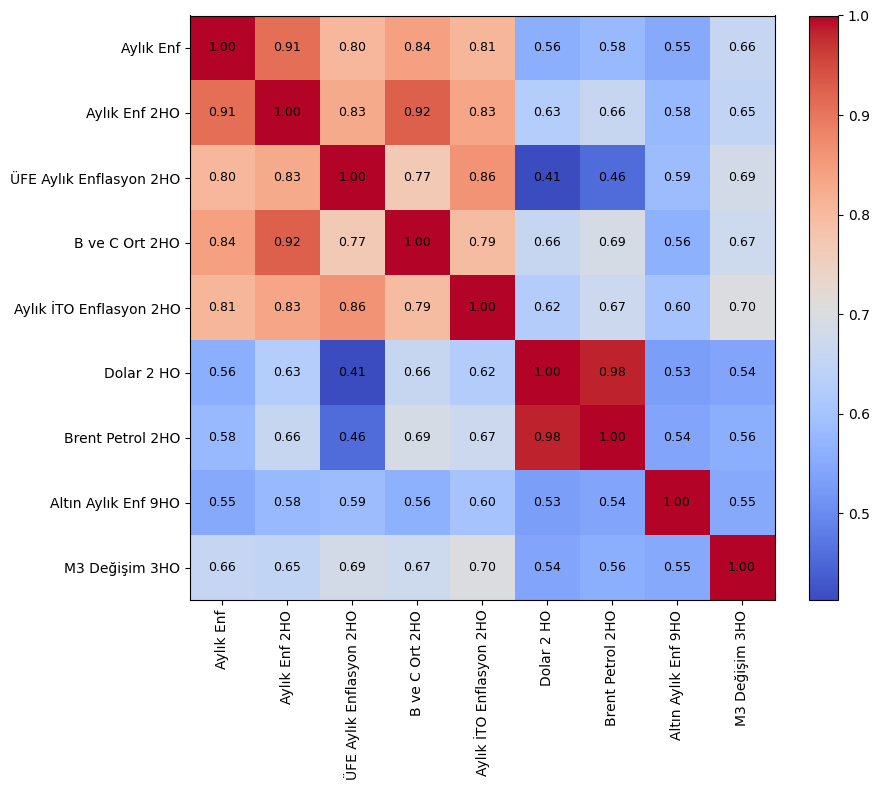

In [4]:
corr = df.corr()
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(
            j, i, f"{corr.iloc[i, j]:.2f}",
            ha="center", va="center", color="black", fontsize=9
        )

plt.tight_layout()
plt.show()

In [5]:
y = df['Aylık Enf']
x = df.drop('Aylık Enf',axis=1)

In [6]:
train_size = int(x.shape[0] * 0.8)
train_size

204

In [7]:
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

In [8]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4

In [9]:
from lazypredict.Supervised import LazyRegressor

In [10]:
model = LazyRegressor(verbose=0)
models, tahmin = model.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 8
[LightGBM] [Info] Start training from score 0.765637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [11]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LarsCV                                       0.74       0.78  1.26        0.05
LassoLarsCV                                  0.74       0.78  1.26        0.02
LassoLarsIC                                  0.74       0.78  1.26        0.01
LassoCV                                      0.74       0.78  1.26        0.07
ElasticNetCV                                 0.73       0.78  1.26        0.12
OrthogonalMatchingPursuitCV                  0.73       0.78  1.26        0.03
RidgeCV                                      0.72       0.77  1.28        0.02
BayesianRidge                                0.72       0.77  1.29        0.05
OrthogonalMatchingPursuit                    0.72       0.77  1.29        0.02
SGDRegressor                                 0.72       0.77  1.29        0.02
Ridge                                        0.72   

In [63]:
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
modelCV = LassoLarsCV(cv=5)
modelCV.fit(x_train, y_train)

LassoLarsCV(cv=5)

In [66]:
y_pred_trainCV = modelCV.predict(x_train)
y_pred_testCV = modelCV.predict(x_test)

In [67]:
r2_trainCV = r2_score(y_train, y_pred_trainCV)
r2_testCV = r2_score(y_test, y_pred_testCV)
rmse_testCV = np.sqrt(mean_squared_error(y_test, y_pred_testCV))

print("R2 (Train):", round(r2_trainCV, 3))
print("R2 (Test):", round(r2_testCV, 3))
print("RMSE (Test):", round(rmse_testCV, 3))

R2 (Train): 0.648
R2 (Test): 0.768
RMSE (Test): 1.283


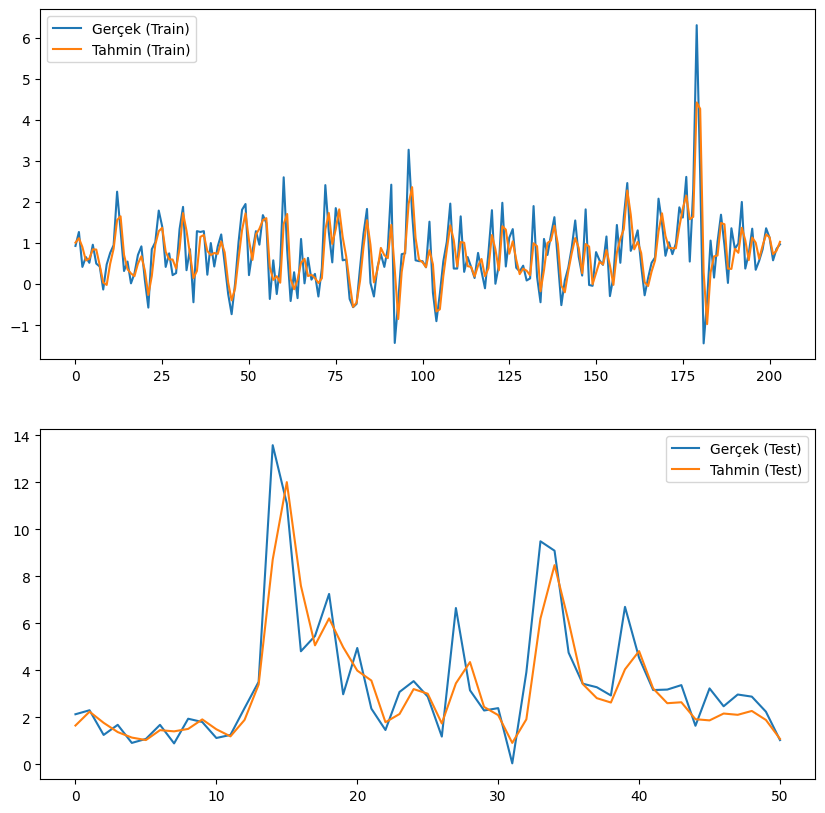

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(y_train.values, label="Gerçek (Train)")
axs[0].plot(y_pred_trainCV, label="Tahmin (Train)")
axs[0].legend()

axs[1].plot(y_test.values, label="Gerçek (Test)")
axs[1].plot(y_pred_testCV, label="Tahmin (Test)")
axs[1].legend()
plt.show()

In [50]:
from sklearn.linear_model import LassoLarsIC

In [69]:
modelIC = LassoLarsIC()
modelIC.fit(x_train, y_train)

LassoLarsIC()

In [70]:
y_predIC = model.predict(x_test)

In [72]:
degiskenler = np.where(model.coef_ != 0)[0]

In [73]:
print(x.columns)
print(x.columns[degiskenler])

Index(['Aylık Enf 2HO', 'ÜFE Aylık Enflasyon 2HO', 'B ve C Ort 2HO',
       'Aylık İTO Enflasyon 2HO', 'Dolar 2 HO', 'Brent Petrol 2HO',
       'Altın Aylık Enf 9HO', 'M3 Değişim 3HO'],
      dtype='object')
Index(['Aylık Enf 2HO', 'ÜFE Aylık Enflasyon 2HO', 'B ve C Ort 2HO',
       'Aylık İTO Enflasyon 2HO', 'Brent Petrol 2HO', 'Altın Aylık Enf 9HO',
       'M3 Değişim 3HO'],
      dtype='object')


Model 8 değişkenden 7’sinin tahminlerde anlamlı rol oynadığı, "Dolar 2HO" değişkeninin ise katsayısının sıfırladığı görülmüştür.

Bu durum, kullanılan yöntemin yüksek korelasyonlu veya modele ek katkı sağlamayan değişkenleri otomatik olarak dışlamasından kaynaklanmaktadır.

Yani "Dolar 2HO" değişkeni TÜFE tahmininde ek bilgi taşımadığı için model tarafından elenmiştir.


In [74]:
y_pred_trainIC = model.predict(x_train)
y_pred_testIC = model.predict(x_test)

In [82]:
r2_trainIC = r2_score(y_train, y_pred_trainIC)
r2_testIC = r2_score(y_test, y_pred_testIC)
rmse_testIC = np.sqrt(mean_squared_error(y_test, y_pred_testIC))

print("R2 (Train):", round(r2_trainIC, 3))
print("R2 (Test):", round(r2_testIC, 3))
print("RMSE (Test):", round(rmse_testIC, 3))

R2 (Train): 0.648
R2 (Test): 0.768
RMSE (Test): 1.283


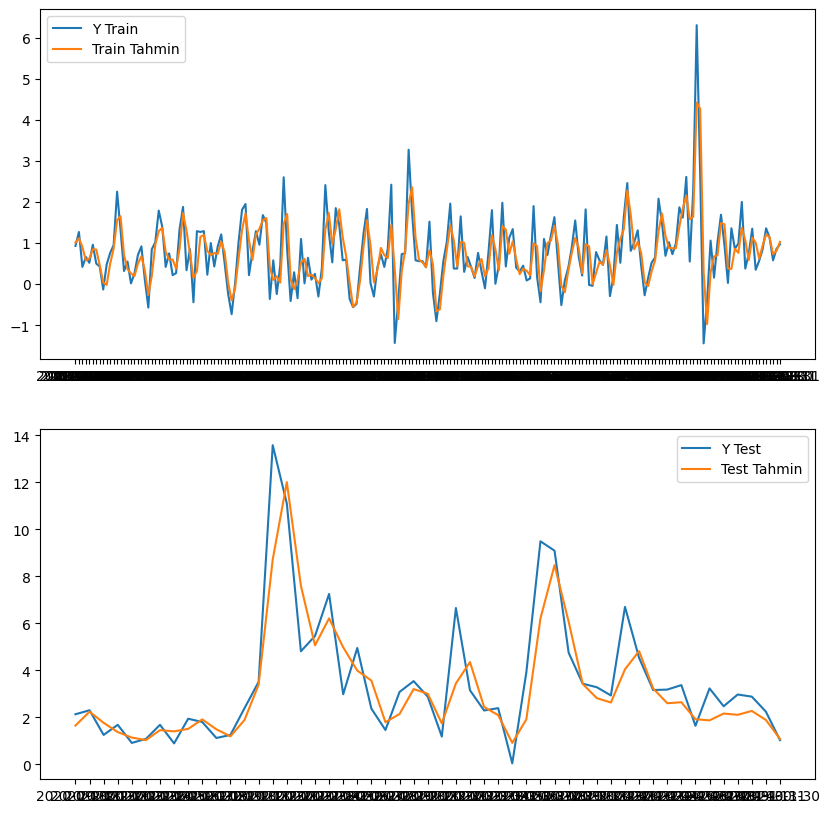

In [76]:
fig,axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(y_train, label="Y Train")
axs[0].plot(y_pred_trainIC, label="Train Tahmin")
axs[0].legend()
axs[1].plot(y_test, label="Y Test")
axs[1].plot(y_pred_testIC, label="Test Tahmin")
axs[1].legend()

In [59]:
from sklearn.linear_model import ElasticNetCV

In [78]:
modelNET = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)
modelNET.fit(x_train, y_train)

ElasticNetCV(cv=5, random_state=42)

In [79]:
y_pred_trainNET = modelNET.predict(x_train)
y_pred_testNET = modelNET.predict(x_test)

In [80]:
r2_trainNET = r2_score(y_train, y_pred_trainNET)
r2_testNET = r2_score(y_test, y_pred_testNET)
rmse_testNET = np.sqrt(mean_squared_error(y_test, y_pred_testNET))

print("R2 (Train):", round(r2_trainNET, 3))
print("R2 (Test):", round(r2_testNET, 3))
print("RMSE (Test):", round(rmse_testNET, 3))

R2 (Train): 0.635
R2 (Test): 0.771
RMSE (Test): 1.277


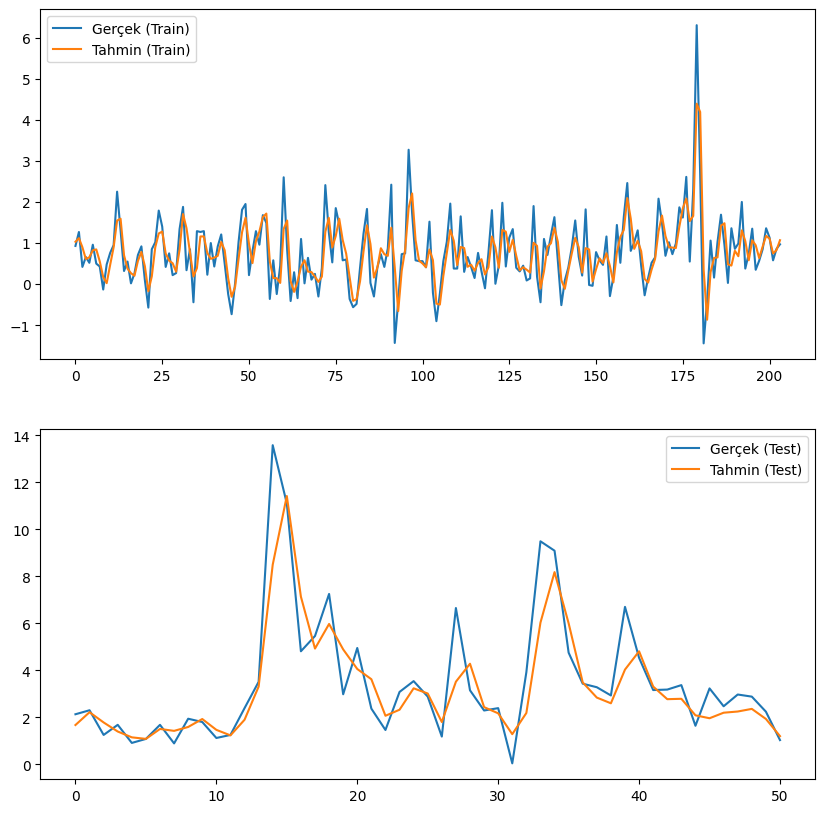

In [81]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(y_train.values, label="Gerçek (Train)")
axs[0].plot(y_pred_trainNET, label="Tahmin (Train)")
axs[0].legend()

axs[1].plot(y_test.values, label="Gerçek (Test)")
axs[1].plot(y_pred_testNET, label="Tahmin (Test)")
axs[1].legend()
plt.show()

In [92]:
print(f"{'Model':<15}{'R2 Train':<10}{'R2 Test':<10}{'RMSE':<10}")
print(f"{'LassoLarsCV':<15}{r2_trainCV:<10.2f}{r2_testCV:<10.2f}{rmse_testCV:<10.2f}")
print(f"{'LassoLarsIC':<15}{r2_trainIC:<10.2f}{r2_testIC:<10.2f}{rmse_testIC:<10.2f}")
print(f"{'ElasticNetCV':<15}{r2_trainNET:<10.2f}{r2_testNET:<10.2f}{rmse_testNET:<10.2f}")


Model          R2 Train  R2 Test   RMSE      
LassoLarsCV    0.65      0.77      1.28      
LassoLarsIC    0.65      0.77      1.28      
ElasticNetCV   0.64      0.77      1.28      
